#下載處理好的資料

In [ ]:
f1id = '1kMA6Ddp04-hnEihtg3Hu1ElvJh__pOBJ'
f2id = '1tgPcn9Aebq6rjSmVHZb7cQy6YWlld0da'
f3id = '1w5Cpt3jHW8z979K-hsLIemoDz6iqb9Z9'

!pip3 install gdown
import gdown
url = 'https://drive.google.com/uc?id=%s'%(f1id)
output = 'train_sorted_strConverted_fillNA.csv'
gdown.download(url, output, quiet=False)

url2 = 'https://drive.google.com/uc?id=%s'%(f2id)
output2 = 'train_locdt_loctm_converted.csv'
gdown.download(url2, output2, quiet=False)

url3 = 'https://drive.google.com/uc?id=%s'%(f3id)
output3 = 'train_X_feature_normalization_onehot.csv'
gdown.download(url3, output3, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1kMA6Ddp04-hnEihtg3Hu1ElvJh__pOBJ
To: /content/train_sorted_strConverted_fillNA.csv
132MB [00:01, 122MB/s]
Downloading...
From: https://drive.google.com/uc?id=1tgPcn9Aebq6rjSmVHZb7cQy6YWlld0da
To: /content/train_locdt_loctm_converted.csv
130MB [00:01, 94.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1w5Cpt3jHW8z979K-hsLIemoDz6iqb9Z9
To: /content/train_X_feature_normalization_onehot.csv
759MB [00:03, 206MB/s]


'train_X_feature_normalization_onehot.csv'

#讀入資料

In [ ]:
import pandas as pd
df = pd.read_csv('train_sorted_strConverted_fillNA.csv')
df_loct = pd.read_csv('train_locdt_loctm_converted.csv')
df_X_feature = pd.read_csv('train_X_feature_normalization_onehot.csv')

In [ ]:
df['fraud_ind'].value_counts()[1]


20355

In [ ]:
df['fraud_ind'].value_counts()[0]

1501432

In [ ]:
df_loct['fraud_ind'].value_counts()[1]

20355

In [ ]:
df_X_feature['fraud_ind'].value_counts()[1]

6131

#使用的資料

完全用原本的，使用df

將類別balance

In [ ]:
df_2 = df.sample(frac=1, random_state=42)

fraud_df = df_2.loc[df_2['fraud_ind'] == 1]
non_fraud_df = df_2.loc[df_2['fraud_ind'] == 0][:20355]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

df_balance = normal_distributed_df.sample(frac=1, random_state=42)
# new_df
df_balance.sort_values(by=['locdt','loctm'], inplace=True)
df_balance

,txkey,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,fraud_ind,hcefg,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd
657,1832978,6351,33965,158580,2352.63,5,61,0,2,0,0,1,5,0,0,1,214.0,201,56486,0,3940,32,2
13307,641465,3348,146230,149583,288.05,5,62,1,8,0,0,0,5,0,0,1,1303.0,289,54828,0,3460,46,0
15067,641468,5720,155241,15547,0.00,5,71,1,8,0,0,0,5,0,0,1,1557.0,349,67619,0,1803,75,0
10980,1832994,6215,38871,154469,407.87,5,62,1,2,0,0,1,5,0,0,1,1704.0,289,54828,0,3460,46,0
3959,1832999,6215,38871,154469,407.87,5,62,1,2,0,0,1,5,0,0,1,2024.0,289,54828,0,3460,46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1506000,784265,3207,46557,184894,360.30,5,61,1,8,0,0,1,5,0,0,90,234859.0,257,10518,0,1457,104,2
1515033,1927692,6540,139705,133946,953.67,5,61,1,2,0,0,1,5,0,0,90,235007.0,288,55807,0,6580,104,0
1515365,1927689,6540,139705,133946,954.10,5,61,1,2,0,0,1,5,0,0,90,235032.0,288,55807,0,6580,104,0
1508353,1927696,6467,86824,106395,101.61,4,61,1,2,0,0,1,5,0,0,90,235140.0,320,65334,0,1495,104,0


把data和time轉換，使用df_loct

In [ ]:
# df_2_loct = df_loct.sample(frac=1, random_state=42)

# fraud_df_loct = df_2_loct.loc[df_2['fraud_ind'] == 1]
# non_fraud_df_loct = df_2_loct.loc[df_2['fraud_ind'] == 0][:20355]

# normal_distributed_df_loct = pd.concat([fraud_df_loct, non_fraud_df_loct])

# new_df_loct = normal_distributed_df_loct.sample(frac=1, random_state=42)
# # new_df
# new_df_loct.sort_values(by='locdt', inplace=True)
# new_df_loct

用300多個feature，用df_X_feature

SMOTEENN資料

#拆分資料

In [ ]:
y = df['fraud_ind']
x = df.drop('fraud_ind', axis = 1)

In [ ]:
y_balance = df_balance['fraud_ind']
x_balance = df_balance.drop('fraud_ind', axis = 1)

In [ ]:
y_loct = df_loct['fraud_ind']
x_loct = df_loct.drop('fraud_ind', axis = 1)

In [ ]:
y_X_feature = df_X_feature['fraud_ind']
x_X_feature = df_X_feature.drop('fraud_ind', axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False) #train與test資料
x_train_part, x_val, y_train_part, y_val = train_test_split(x_train, y_train, test_size=0.2, shuffle=False) #train與val資料

In [ ]:
x_balance_train, x_balance_test, y_balance_train, y_balance_test = train_test_split(x_balance, y_balance, test_size=0.2, shuffle=False) #train與test資料
x_balance_train_part, x_balance_val, y_balance_train_part, y_balance_val = train_test_split(x_balance_train, y_balance_train, test_size=0.2, shuffle=False) #train與val資料

In [ ]:
x_loct_train, x_loct_test, y_loct_train, y_loct_test = train_test_split(x_loct, y_loct, test_size=0.2, shuffle=False) #train與test資料
x_loct_train_part, x_loct_val, y_loct_train_part, y_loct_val = train_test_split(x_loct_train, y_loct_train, test_size=0.2, shuffle=False) #train與val資料

In [ ]:
x_X_feature_train, x_X_feature_test, y_X_feature_train, y_X_feature_test = train_test_split(x_X_feature, y_X_feature, test_size=0.2, shuffle=False) #train與test資料
x_X_feature_train_part, x_X_feature_val, y_X_feature_train_part, y_X_feature_val = train_test_split(x_X_feature_train, y_X_feature_train, test_size=0.2, shuffle=False) #train與val資料

#開始訓練

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
dtrain = xgb.DMatrix(x_train_part, label=y_train_part)
dval = xgb.DMatrix(x_val, label=y_val)
dtest = xgb.DMatrix(x_test, label=y_test)

param = {'max_depth': 2, 'eta': 1, 'objective': 'binary:logistic'}
param['nthread'] = 4
param['eval_metric'] = 'auc'
evallist = [(dval, 'eval'), (dtrain, 'train')]
num_round = 100

In [ ]:
bst = xgb.train(param, dtrain, num_round, evallist)
xgb_model = bst.save_model('0001.model')

[0]	eval-auc:0.770035	train-auc:0.793782
[1]	eval-auc:0.936248	train-auc:0.935981
[2]	eval-auc:0.943595	train-auc:0.937599
[3]	eval-auc:0.955122	train-auc:0.951748
[4]	eval-auc:0.949649	train-auc:0.950211
[5]	eval-auc:0.957205	train-auc:0.95343
[6]	eval-auc:0.960732	train-auc:0.954816
[7]	eval-auc:0.961547	train-auc:0.958132
[8]	eval-auc:0.962472	train-auc:0.959313
[9]	eval-auc:0.963207	train-auc:0.961269
[10]	eval-auc:0.963824	train-auc:0.962001
[11]	eval-auc:0.96359	train-auc:0.962413
[12]	eval-auc:0.964057	train-auc:0.96308
[13]	eval-auc:0.964208	train-auc:0.963053
[14]	eval-auc:0.964721	train-auc:0.963673
[15]	eval-auc:0.964495	train-auc:0.963901
[16]	eval-auc:0.9646	train-auc:0.964923
[17]	eval-auc:0.964457	train-auc:0.96585
[18]	eval-auc:0.963919	train-auc:0.965749
[19]	eval-auc:0.964837	train-auc:0.966461
[20]	eval-auc:0.963905	train-auc:0.966313
[21]	eval-auc:0.963782	train-auc:0.966821
[22]	eval-auc:0.964082	train-auc:0.96712
[23]	eval-auc:0.964245	train-auc:0.967314
[24]	eval

In [ ]:
y_pred_xgb = bst.predict(dtest)
y_pred_xgb

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 8.8906789e-05,
       1.0700276e-03, 2.4705706e-03], dtype=float32)

In [ ]:
dtrain_balance = xgb.DMatrix(x_balance_train_part, label=y_balance_train_part)
dval_balance = xgb.DMatrix(x_balance_val, label=y_balance_val)
dtest_balance = xgb.DMatrix(x_balance_test, label=y_balance_test)

param = {'max_depth': 2, 'eta': 1, 'objective': 'binary:logistic'}
param['nthread'] = 4
param['eval_metric'] = 'auc'
evallist_balance = [(dval_balance, 'eval'), (dtrain_balance, 'train')]
num_round = 100

In [ ]:
bst_balance = xgb.train(param, dtrain_balance, num_round, evallist_balance)
xgb_balance_model = bst_balance.save_model('0002.model')

[0]	eval-auc:0.869852	train-auc:0.863697
[1]	eval-auc:0.934078	train-auc:0.929138
[2]	eval-auc:0.941108	train-auc:0.933342
[3]	eval-auc:0.954232	train-auc:0.948369
[4]	eval-auc:0.953081	train-auc:0.951712
[5]	eval-auc:0.957501	train-auc:0.956895
[6]	eval-auc:0.959606	train-auc:0.958665
[7]	eval-auc:0.961802	train-auc:0.961291
[8]	eval-auc:0.962667	train-auc:0.962774
[9]	eval-auc:0.965157	train-auc:0.965201
[10]	eval-auc:0.965534	train-auc:0.966191
[11]	eval-auc:0.965964	train-auc:0.967008
[12]	eval-auc:0.96567	train-auc:0.967801
[13]	eval-auc:0.965089	train-auc:0.96811
[14]	eval-auc:0.96538	train-auc:0.968743
[15]	eval-auc:0.965928	train-auc:0.96953
[16]	eval-auc:0.966664	train-auc:0.970172
[17]	eval-auc:0.966824	train-auc:0.970443
[18]	eval-auc:0.966472	train-auc:0.970705
[19]	eval-auc:0.966537	train-auc:0.971012
[20]	eval-auc:0.966232	train-auc:0.971319
[21]	eval-auc:0.96642	train-auc:0.971609
[22]	eval-auc:0.966591	train-auc:0.972149
[23]	eval-auc:0.966675	train-auc:0.97236
[24]	eva

In [ ]:
y_balance_pred_xgb = bst_balance.predict(dtest)
y_balance_pred_xgb

array([0.00407387, 0.00682009, 0.05865309, ..., 0.00208333, 0.03914503,
       0.3375032 ], dtype=float32)

In [ ]:
dtrain_loct = xgb.DMatrix(x_loct_train_part, label=y_loct_train_part)
dval_loct = xgb.DMatrix(x_loct_val, label=y_loct_val)
dtest_loct = xgb.DMatrix(x_loct_test, label=y_loct_test)

param = {'max_depth': 2, 'eta': 1, 'objective': 'binary:logistic'}
param['nthread'] = 4
param['eval_metric'] = 'auc'
evallist_loct = [(dval_loct, 'eval'), (dtrain_loct, 'train')]
num_round = 100

In [ ]:
bst_loct = xgb.train(param, dtrain_loct, num_round, evallist_loct)
xgb_loct_model = bst_loct.save_model('0003.model')

[0]	eval-auc:0.770035	train-auc:0.793782
[1]	eval-auc:0.936248	train-auc:0.935981
[2]	eval-auc:0.943595	train-auc:0.937599
[3]	eval-auc:0.955122	train-auc:0.951748
[4]	eval-auc:0.949649	train-auc:0.950211
[5]	eval-auc:0.957205	train-auc:0.95343
[6]	eval-auc:0.960732	train-auc:0.954816
[7]	eval-auc:0.961547	train-auc:0.958132
[8]	eval-auc:0.962472	train-auc:0.959313
[9]	eval-auc:0.963207	train-auc:0.961269
[10]	eval-auc:0.963824	train-auc:0.962001
[11]	eval-auc:0.96359	train-auc:0.962413
[12]	eval-auc:0.964057	train-auc:0.96308
[13]	eval-auc:0.964208	train-auc:0.963053
[14]	eval-auc:0.964721	train-auc:0.963673
[15]	eval-auc:0.964688	train-auc:0.963754
[16]	eval-auc:0.964592	train-auc:0.964009
[17]	eval-auc:0.964959	train-auc:0.96444
[18]	eval-auc:0.965182	train-auc:0.965657
[19]	eval-auc:0.965026	train-auc:0.966656
[20]	eval-auc:0.965175	train-auc:0.966811
[21]	eval-auc:0.965009	train-auc:0.966845
[22]	eval-auc:0.96487	train-auc:0.967265
[23]	eval-auc:0.964759	train-auc:0.967267
[24]	ev

In [ ]:
y_loct_pred_xgb = bst_loct.predict(dtest_loct)
y_loct_pred_xgb

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 5.1189265e-05,
       9.3371142e-04, 6.6230432e-03], dtype=float32)

In [ ]:
dtrain_X_feature = xgb.DMatrix(x_X_feature_train_part, label=y_X_feature_train_part)
dval_X_feature = xgb.DMatrix(x_X_feature_val, label=y_X_feature_val)
dtest_X_feature = xgb.DMatrix(x_X_feature_test, label=y_X_feature_test)

param = {'max_depth': 2, 'eta': 1, 'objective': 'binary:logistic'}
param['nthread'] = 4
param['eval_metric'] = 'auc'
evallist_X_feature = [(dval_X_feature, 'eval'), (dtrain_X_feature, 'train')]
num_round = 100

In [ ]:
bst_X_feature = xgb.train(param, dtrain_X_feature, num_round, evallist_X_feature)
xgb_X_feature_model = bst_X_feature.save_model('0004.model')

[0]	eval-auc:0.769393	train-auc:0.797103
[1]	eval-auc:0.948406	train-auc:0.937032
[2]	eval-auc:0.94551	train-auc:0.938007
[3]	eval-auc:0.944894	train-auc:0.940119
[4]	eval-auc:0.959707	train-auc:0.954115
[5]	eval-auc:0.958804	train-auc:0.95364
[6]	eval-auc:0.959891	train-auc:0.953836
[7]	eval-auc:0.962292	train-auc:0.956043
[8]	eval-auc:0.964142	train-auc:0.956829
[9]	eval-auc:0.964042	train-auc:0.957106
[10]	eval-auc:0.963157	train-auc:0.956583
[11]	eval-auc:0.963829	train-auc:0.958317
[12]	eval-auc:0.964171	train-auc:0.959548
[13]	eval-auc:0.96458	train-auc:0.958743
[14]	eval-auc:0.963589	train-auc:0.959689
[15]	eval-auc:0.96388	train-auc:0.960822
[16]	eval-auc:0.963578	train-auc:0.961285
[17]	eval-auc:0.964096	train-auc:0.961501
[18]	eval-auc:0.96351	train-auc:0.962151
[19]	eval-auc:0.962953	train-auc:0.962226
[20]	eval-auc:0.963784	train-auc:0.962731
[21]	eval-auc:0.964117	train-auc:0.963137
[22]	eval-auc:0.964215	train-auc:0.96458
[23]	eval-auc:0.961609	train-auc:0.965864
[24]	eva

In [ ]:
y_X_feature_pred_xgb = bst_X_feature.predict(dtest_X_feature)
y_X_feature_pred_xgb

array([4.0844496e-04, 4.5725825e-05, 2.4136760e-04, ..., 2.0114701e-04,
       5.6487988e-03, 6.9652102e-04], dtype=float32)

# Metrics

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

XGBOOST

ROC分數

In [ ]:
roc_auc_score(y_test, y_pred_xgb)

0.9362718818052367

In [ ]:
roc_auc_score(y_test, y_balance_pred_xgb)

0.9479079507421222

In [ ]:
roc_auc_score(y_loct_test, y_loct_pred_xgb)

0.9442382634355376

In [ ]:
roc_auc_score(y_X_feature_test, y_X_feature_pred_xgb)

0.9413961594126306

F1-score分數

In [ ]:
th = 0.6  #設定threshold

In [ ]:
f1_score(y_test,(y_pred_xgb > th).astype(int))

0.2218588171163805

In [ ]:
f1_score(y_test,(y_balance_pred_xgb > th).astype(int))

0.16200152049208652

In [ ]:
f1_score(y_loct_test,(y_loct_pred_xgb > th).astype(int))

0.31331039957660756

In [ ]:
f1_score(y_X_feature_test,(y_X_feature_pred_xgb > th).astype(int))

0.22066198595787365

Accuracy分數

In [ ]:
print('Start predicting...')

accuracy = accuracy_score(y_test,(y_pred_xgb > th).astype(int))*100
print ("Accuracy of XGBOOST is: ", accuracy)

Start predicting...
Accuracy of XGBOOST is:  99.06195992876809


In [ ]:
print('Start predicting...')

accuracy = accuracy_score(y_test,(y_balance_pred_xgb > th).astype(int))*100
print ("Accuracy of XGBOOST is: ", accuracy)

Start predicting...
Accuracy of XGBOOST is:  92.03240920232095


In [ ]:
print('Start predicting...')

accuracy = accuracy_score(y_loct_test,(y_loct_pred_xgb > th).astype(int))*100
print ("Accuracy of XGBOOST is: ", accuracy)

Start predicting...
Accuracy of XGBOOST is:  99.14738564453702


In [ ]:
print('Start predicting...')

accuracy = accuracy_score(y_X_feature_test,(y_X_feature_pred_xgb > th).astype(int))*100
print ("Accuracy of XGBOOST is: ", accuracy)

Start predicting...
Accuracy of XGBOOST is:  99.14903403863845


precision

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
precision = precision_score(y_test, (y_pred_xgb > th).astype(int), zero_division=0)
print("precision : ", precision)


precision :  0.4845238095238095


In [ ]:
precision = precision_score(y_test, (y_balance_pred_xgb > th).astype(int), zero_division=0)
print("precision : ", precision)


precision :  0.08977747137002566


In [ ]:
precision = precision_score(y_loct_test, (y_loct_pred_xgb > th).astype(int), zero_division=0)
print("precision : ", precision)


precision :  0.6231578947368421


In [ ]:
precision = precision_score(y_X_feature_test, (y_X_feature_pred_xgb > th).astype(int), zero_division=0)
print("precision : ", precision)


precision :  0.6790123456790124


recall

In [ ]:
recall = recall_score(y_test, (y_pred_xgb > th).astype(int))
print("recall : ",recall)

recall :  0.1438670908448215


In [ ]:
recall = recall_score(y_test, (y_balance_pred_xgb > th).astype(int))
print("recall : ",recall)

recall :  0.8285613290915518


In [ ]:
recall = recall_score(y_loct_test, (y_loct_pred_xgb > th).astype(int))
print("recall : ",recall)

recall :  0.20926122304701308


In [ ]:
recall = recall_score(y_X_feature_test, (y_X_feature_pred_xgb > th).astype(int))
print("recall : ",recall)

recall :  0.1317365269461078


# SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
smote = SMOTE(random_state=42)
x_over,y_over = smote.fit_resample(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


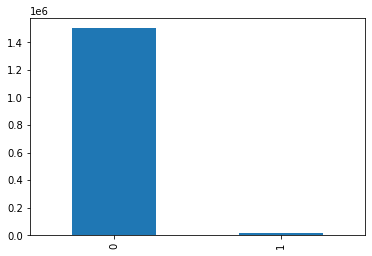

In [ ]:
#before smote 
y.value_counts().plot.bar()

In [ ]:
x.shape

(1521787, 22)

In [ ]:
type(x)

pandas.core.frame.DataFrame

In [ ]:
type(y)

pandas.core.series.Series

In [ ]:
y

0          0
1          0
2          0
3          0
4          0
          ..
1521782    0
1521783    0
1521784    0
1521785    0
1521786    0
Name: fraud_ind, Length: 1521787, dtype: int64

In [ ]:

y

0          0
1          0
2          0
3          0
4          0
          ..
1521782    0
1521783    0
1521784    0
1521785    0
1521786    0
Name: fraud_ind, Length: 1521787, dtype: int64

In [ ]:
x_over.shape

(2399806, 22)

In [ ]:
y_over.shape

(2399806,)

In [ ]:
y_over = pd.DataFrame(data=y_over.flatten())

AFTER SMOTE


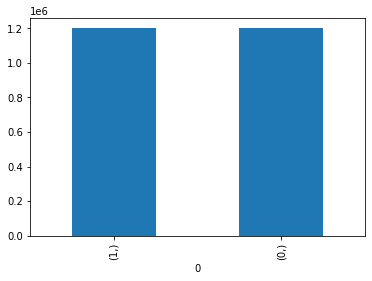

In [ ]:
print("AFTER SMOTE")
y_over.value_counts().plot.bar()

In [ ]:
x_over.shape

(2399806, 22)

In [ ]:
x_over

array([[1.54733700e+06, 6.76700000e+03, 1.37279000e+05, ...,
        5.81700000e+03, 1.02000000e+02, 0.00000000e+00],
       [3.61558000e+05, 6.03200000e+03, 9.51260000e+04, ...,
        5.81700000e+03, 1.02000000e+02, 0.00000000e+00],
       [1.83366200e+06, 6.21500000e+03, 1.04992000e+05, ...,
        6.58000000e+03, 3.80000000e+01, 0.00000000e+00],
       ...,
       [1.88748901e+06, 6.43696911e+03, 4.25644588e+03, ...,
        3.87414349e+03, 6.90786979e+00, 2.00000000e+00],
       [7.55071574e+05, 4.80850501e+03, 1.24309489e+05, ...,
        4.70888455e+03, 6.21627582e+01, 0.00000000e+00],
       [1.80732979e+06, 6.73582545e+03, 6.63310931e+04, ...,
        3.58622140e+02, 1.04000000e+02, 7.60598387e-01]])

In [ ]:
from sklearn.model_selection import train_test_split
x_over_train, x_over_test, y_over_train, y_over_test = train_test_split(x_over, y_over, test_size=0.2, shuffle=False) #train與test資料
x_over_train_part, x_over_val, y_over_train_part, y_over_val = train_test_split(x_over_train, y_over_train, test_size=0.2, shuffle=False) #train與val資料

In [ ]:
spw = 1501432 / 20355

In [ ]:
model = XGBClassifier(max_depth=2, nthread=4, scale_pos_weight=spw, eval_metric='auc', n_estimators=10)

In [ ]:
model.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=73.76231884057971,
              seed=None, silent=None, subsample=1, verbosity=1)>

In [ ]:
bst_class = model.fit(x_train_part, y_train_part, eval_set=[(x_val, y_val)])

[0]	validation_0-auc:0.866708
[1]	validation_0-auc:0.893555
[2]	validation_0-auc:0.906847
[3]	validation_0-auc:0.911785
[4]	validation_0-auc:0.90822
[5]	validation_0-auc:0.91784
[6]	validation_0-auc:0.916954
[7]	validation_0-auc:0.933283
[8]	validation_0-auc:0.939221
[9]	validation_0-auc:0.945002


In [ ]:
y_pred = bst_class.predict(x_test)

In [ ]:
x_train

,txkey,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,hcefg,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd
0,1547337,6767,137279,176279,785.96,5,62,0,5,0,0,5,0,0,1,70602.0,191,16615,0,5817,102,0
1,361558,6032,95126,90258,325.94,5,62,0,4,0,0,5,0,0,1,192920.0,251,78641,0,5817,102,0
2,1833662,6215,104992,168046,288.05,5,62,1,2,0,0,5,0,0,1,160124.0,380,54238,0,6580,38,0
3,1119486,6717,158233,33494,796.90,5,62,0,5,0,0,5,0,0,1,153353.0,304,33656,0,5800,102,0
4,1047761,5975,78764,162106,800.02,5,62,0,4,0,0,5,0,0,1,191448.0,263,93792,0,5817,102,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1217424,1020122,5975,43783,135161,726.90,5,62,0,4,0,0,5,0,0,72,194259.0,191,91538,0,5817,102,0
1217425,947959,6189,156962,130978,747.35,5,62,0,5,0,0,5,0,0,72,152041.0,241,94342,0,5817,102,0
1217426,1448113,6189,55833,73570,778.01,2,62,0,2,0,0,5,0,0,72,92514.0,264,92744,0,5817,102,0
1217427,948017,6189,8720,55314,1145.74,5,62,0,4,0,0,5,0,0,72,162152.0,349,95506,0,5817,102,0


In [ ]:
x_over = pd.DataFrame(x_over, columns=x_train.columns)
type(x_over)



pandas.core.frame.DataFrame

In [ ]:
type(y_train)

pandas.core.series.Series

In [ ]:
type(y_over)

pandas.core.frame.DataFrame

In [ ]:
y_over = pd.DataFrame(y_over, columns=['fraud_ind'])
y_over

,fraud_ind
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2399801,NaN
2399802,NaN
2399803,NaN
2399804,NaN


In [ ]:
x_over

,txkey,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,hcefg,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd
0,1.547337e+06,6767.000000,137279.000000,176279.000000,785.960000,5.0,62.000000,0.000000,5.000000,0.0,0.0,5.0,0.0,0.0,1.000000,70602.000000,191.000000,16615.000000,0.0,5817.000000,102.000000,0.000000
1,3.615580e+05,6032.000000,95126.000000,90258.000000,325.940000,5.0,62.000000,0.000000,4.000000,0.0,0.0,5.0,0.0,0.0,1.000000,192920.000000,251.000000,78641.000000,0.0,5817.000000,102.000000,0.000000
2,1.833662e+06,6215.000000,104992.000000,168046.000000,288.050000,5.0,62.000000,1.000000,2.000000,0.0,0.0,5.0,0.0,0.0,1.000000,160124.000000,380.000000,54238.000000,0.0,6580.000000,38.000000,0.000000
3,1.119486e+06,6717.000000,158233.000000,33494.000000,796.900000,5.0,62.000000,0.000000,5.000000,0.0,0.0,5.0,0.0,0.0,1.000000,153353.000000,304.000000,33656.000000,0.0,5800.000000,102.000000,0.000000
4,1.047761e+06,5975.000000,78764.000000,162106.000000,800.020000,5.0,62.000000,0.000000,4.000000,0.0,0.0,5.0,0.0,0.0,1.000000,191448.000000,263.000000,93792.000000,0.0,5817.000000,102.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399801,5.152597e+05,6881.000000,137022.460335,60431.925165,550.056517,5.0,0.000000,0.000000,0.000000,0.0,0.0,5.0,0.0,0.0,32.283795,205771.153496,457.000000,61396.700815,0.0,0.000000,102.000000,0.000000
2399802,7.127367e+05,3524.109891,100166.651028,174249.119915,258.951326,5.0,62.000000,1.000000,8.000000,0.0,0.0,5.0,0.0,0.0,43.703019,71326.219753,367.526787,55232.144787,0.0,6225.330123,40.747077,0.000000
2399803,1.887489e+06,6436.969106,4256.445879,173585.724088,1290.520387,5.0,4.544722,1.000000,2.000000,0.0,0.0,5.0,0.0,0.0,51.093473,142426.904946,212.719580,2160.648236,0.0,3874.143489,6.907870,2.000000
2399804,7.550716e+05,4808.505008,124309.488858,60356.605627,1225.719185,5.0,61.615254,0.384746,5.538986,0.0,0.0,5.0,0.0,0.0,69.230507,220018.208443,311.474644,18781.814277,0.0,4708.884546,62.162758,0.000000


In [ ]:
over_df = pd.concat([x_over,y_over])
over_df

,txkey,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,hcefg,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,fraud_ind
0,1547337.0,6767.0,137279.0,176279.0,785.96,5.0,62.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,1.0,70602.0,191.0,16615.0,0.0,5817.0,102.0,0.0,NaN
1,361558.0,6032.0,95126.0,90258.0,325.94,5.0,62.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,1.0,192920.0,251.0,78641.0,0.0,5817.0,102.0,0.0,NaN
2,1833662.0,6215.0,104992.0,168046.0,288.05,5.0,62.0,1.0,2.0,0.0,0.0,5.0,0.0,0.0,1.0,160124.0,380.0,54238.0,0.0,6580.0,38.0,0.0,NaN
3,1119486.0,6717.0,158233.0,33494.0,796.90,5.0,62.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,1.0,153353.0,304.0,33656.0,0.0,5800.0,102.0,0.0,NaN
4,1047761.0,5975.0,78764.0,162106.0,800.02,5.0,62.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,1.0,191448.0,263.0,93792.0,0.0,5817.0,102.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2399802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2399803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2399804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
over_df.sort_values(by=['locdt','loctm'], inplace=True)
over_df

,txkey,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,hcefg,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,fraud_ind
441,1119159.0,6716.0,12765.0,101514.0,966.58,4.0,62.0,0.0,2.0,0.0,0.0,5.0,1.0,2.0,1.0,29.0,247.0,34949.0,0.0,5817.0,102.0,0.0,NaN
9877,641444.0,5575.0,34837.0,60869.0,1071.10,5.0,62.0,1.0,8.0,0.0,0.0,5.0,0.0,0.0,1.0,40.0,203.0,33794.0,0.0,2138.0,44.0,0.0,NaN
6215,188670.0,6769.0,22630.0,110573.0,438.21,5.0,62.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,1.0,45.0,251.0,79257.0,0.0,3588.0,102.0,0.0,NaN
13574,1475737.0,6767.0,91588.0,208961.0,1174.17,5.0,62.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,1.0,48.0,293.0,14765.0,0.0,5817.0,102.0,0.0,NaN
12196,641443.0,3198.0,84148.0,180103.0,367.29,5.0,60.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,1.0,51.0,251.0,68966.0,0.0,3982.0,38.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2399802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2399803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2399804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dtrain_over = xgb.DMatrix(x_over, label=y_over)

# x_val = pd.DataFrame(x_val, columns=x_val.columns)
dval_over = xgb.DMatrix(x_val, label=y_val)

# x_test = pd.DataFrame(x_test, columns=x_test.columns)
dtest_over = xgb.DMatrix(x_test)

param = {'max_depth': 2, 'eta': 1, 'objective': 'binary:logistic'}
param['nthread'] = 4
param['eval_metric'] = 'auc'
evallist_over = [(dval_over, 'eval'), (dtrain_over, 'train')]
num_round = 10

In [ ]:
bst_over = xgb.train(param, dtrain_over, num_round, evallist_over)
xgb_over_model = bst_over.save_model('0005.model')

XGBoostError: ignored

In [ ]:
y_over_pred_xgb = bst_over.predict(dtest)
y_over_pred_xgb

In [ ]:
y_over_pred_xgb = bst_over.predict(dtest)
y_over_pred_xgb

In [ ]:
f1_score(y_test,(y_pred > th).astype(int))

In [ ]:
f1_score(y_test,(y_over_pred_xgb > th).astype(int))